## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 6.3: portion of the Galactic plane in 21cm continuum showing bremsstrahlung and synchrotron sources

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import (ImageNormalize, SqrtStretch, LogStretch, AsinhStretch)
%matplotlib inline

-0.15332128 7.7325406


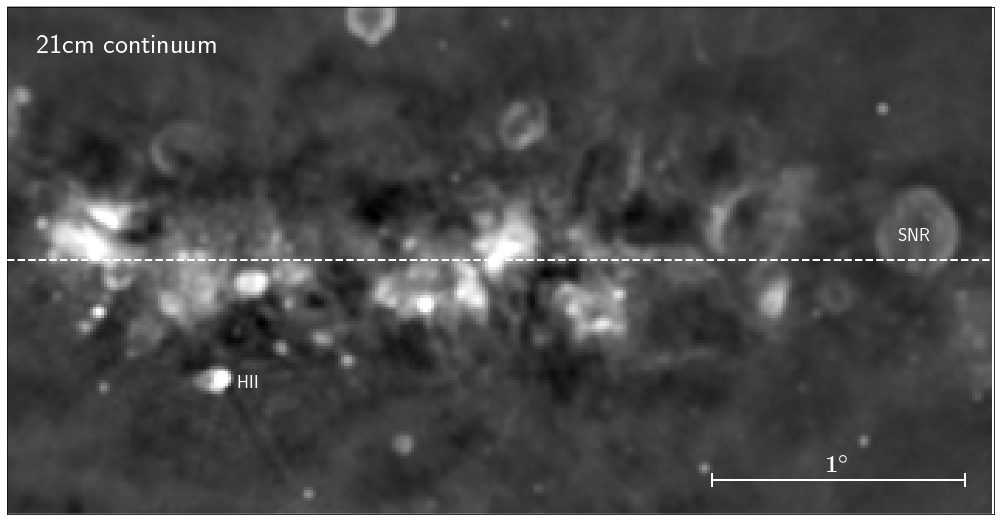

In [5]:
fig = plt.figure(figsize=(14,7.5))

hdu = fits.open('g330to340.i.fits')
wcs1 = WCS(hdu[0])
ax1 = fig.add_subplot(111, projection=wcs1)
im1 = hdu[0].data
hd1 = hdu[0].header
hdu.close()
#print(hd1)

imin, imax = 380, 730
imcrop = im1[:, imin:imax]
#print(imcrop.min(),imcrop.max())

norm = ImageNormalize(imcrop, vmin=-0.15, vmax=2.0, stretch=AsinhStretch(a=0.1))
ax1.imshow(imcrop, cmap='gray', origin='lower', norm=norm) 

ax1.set_xlim(0,350)
ax1.set_ylim(0,180)
plt.plot([0,350], [90,90], ls='dashed', color='white', lw=2)
ax1.text(82, 45, 'HII', color='white', fontsize=18, fontweight='normal')
ax1.text(316, 97, 'SNR', color='white', fontsize=18, fontweight='normal')

# scale bar
dx = hd1['CDELT1']
#print(dx)
# 40'' per pixel, make bar 1 deg = 90 pix
xbar = 90
x0 = 250
x1 = x0 + xbar
y0 = 12
dy = 2
ax1.plot([x0,x1],[y0,y0], 'w-', lw=2)
ax1.plot([x0,x0],[y0-dy,y0+dy], 'w-', lw=2)
ax1.plot([x1,x1],[y0-dy,y0+dy], 'w-', lw=2)
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
ax1.text(0.5*(x0+x1), y0+1.5*dy, r'$\boldsymbol{1^\circ}$', color='white', fontsize=24, fontweight='heavy', ha='center')
ax1.text(0.03,0.91,'21cm continuum', {'color': 'w', 'fontsize': 28}, transform=ax1.transAxes)

for i in (0,1):
    ax1.coords[i].set_ticks_visible(False)
    ax1.coords[i].set_ticklabel_visible(False)
    ax1.coords[i].set_ticks_visible(False)
    ax1.coords[i].set_ticklabel_visible(False)
    ax1.coords[i].set_axislabel('')
    ax1.coords[i].set_axislabel('')

plt.tight_layout()
plt.savefig('galactic_plane_continuum_21cm.pdf')